# Tarea 3

## 1. Descripción del Problema

Se plantea un problema de poder determinar si una paciente presenta una enfermedad cardiovascular a partir de un conjunto de atributos de los sujetos de estudio.

¿Pueden los atributos de las personas, como su nivel de colesterol, máximo ritmo cardiaco y presión arterial determinar si una persona presentará una enfermedad cardiovascular?

Se utilizará un enfoque centrado en el uso de algoritmos de aprendizaje de máquina no supervisado, donde se generan clusters o agrupaciones con casos  de personas con y sin enfermedades cardiovasculares, para así, poder realizar predicciones para nuevos casos.

### Ubicación del dataset



El dataset se puede encontrar en el presente [link](https://www.kaggle.com/fedesoriano/heart-failure-prediction).

## 2. Exploración de datos

Para realizar la exploración de los datos, se hará uso de *OpenRefine* y la función *describe* que ofrece *pandas* para poder observar información sobre un conjunto de datos, además de otras funciones para visualizar los comportamientos de los datos.

Lo primero a identificar, es que hay datos tanto categóricos (género, hipertensión, enfermedades del corazón, se ha casado, tipo de trabajo y lugar de residencia), como numéricos (edad, nivel de glucosa, índice de masa corporal).

Al realizar el análisis de datos exploratorio sobre las columnas del dataset, se hará uso de las técnicas de estadística descriptiva y de gráficos para realizar una inspección visual de los elementos.

In [39]:
#Antes de realizar cualquier operación, se cargan los datos.
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
from numpy import unique
from numpy import where
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.model_selection import train_test_split

import category_encoders as ce
from matplotlib import pyplot

%matplotlib inline

data = pd.read_csv('heart_diseases_data.csv', index_col=0)


### Estadística descriptiva

Esta estadística consiste en realizar el resumen del valor mínimo, primer cuartil, mediana, tercer cuartil y valor máximo para cada columna numérica del dataset. Al realizarlo, podemos observar:

#### Edad

Para la columna de edad, se puede identificar:
- Valor mínimo: 28
- Primer cuartil: 47
- Mediana: 54
- Tercer cuartil: 60
- Valor máximo: 77

#### Presión arterial en reposo

Para la columna de presión arterial en reposo, se puede identificar:
- Valor mínimo: 0
- Primer cuartil: 120
- Mediana: 130
- Tercer cuartil: 140
- Valor máximo: 200

#### Nivel de colesterol

Para la columna de nivel de colesterol, se puede identificar:
- Valor mínimo: 0
- Primer cuartil: 173 
- Mediana: 223
- Tercer cuartil: 267
- Valor máximo: 603


#### Nivel de máximo de ritmo cardiaco en la sangre

Para la columna de nivel máximo de ritmo cardiaco, se puede identificar:
- Valor mínimo: 60
- Primer cuartil: 120
- Mediana: 138
- Tercer cuartil: 156 
- Valor máximo: 202

In [40]:
data.describe()

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


A partir del análisis mediante la estadística descriptiva, podemos observar la distribución de los datos con respecto a los atributos de edad, colesterol, ritmo cardiaco y presión arterial. 


### Particionar en clases

Una técnica que se puede usar para la exploración de datos en este caso, es particionarlos en clases, en este caso, sería interesante particionarlos en género (masculino o femenino). 

In [41]:
male_group = data[data['Sex'] == 'M']
female_group = data[data['Sex'] == 'F']

In [42]:
female_group.describe()

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.00000
mean,131.978022,255.774725,0.104396,147.000000,0.664286,0.21978
std,18.591258,62.850070,0.306617,21.963556,0.959506,0.41524
min,94.000000,141.000000,0.000000,90.000000,0.000000,0.00000
25%,120.000000,210.250000,0.000000,130.000000,0.000000,0.00000
50%,130.000000,248.000000,0.000000,150.000000,0.000000,0.00000
75%,140.000000,294.000000,0.000000,163.000000,1.000000,0.00000
max,200.000000,564.000000,1.000000,192.000000,6.200000,1.00000


In [43]:
male_group.describe()

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,133.359929,241.040780,0.187943,138.040780,0.978191,0.560284
std,16.842386,57.509194,0.391014,24.922903,1.096840,0.496793
min,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,120.000000,206.750000,0.000000,120.000000,0.000000,0.000000
50%,130.000000,234.000000,0.000000,139.500000,0.800000,1.000000
75%,140.000000,272.250000,0.000000,156.000000,1.800000,1.000000
max,200.000000,603.000000,1.000000,202.000000,5.600000,1.000000


El primer dato interesante que podemos apreciar corresponde a la gran diferencia entre la cantidad de hombres encontrados en el dataset con la cantidad de mujeres. Mientras que hay 725 hombres, apenas se pueden observar 193 mujeres.

### Plots

<AxesSubplot:title={'center':'RestingBP'}, xlabel='ChestPainType'>

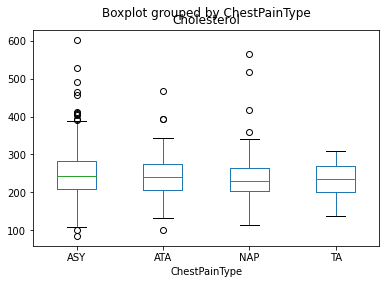

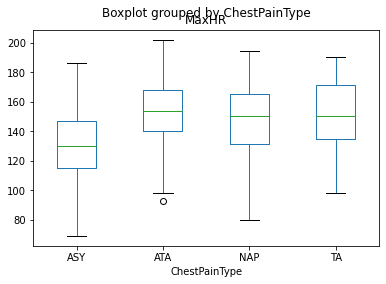

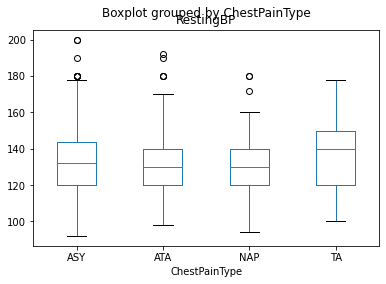

In [44]:
data.boxplot(by ='ChestPainType', column =['Cholesterol'], grid = False)
data.boxplot(by ='ChestPainType', column =['MaxHR'], grid = False)
data.boxplot(by ='ChestPainType', column =['RestingBP'], grid = False)

<AxesSubplot:title={'center':'RestingBP'}, xlabel='RestingECG'>

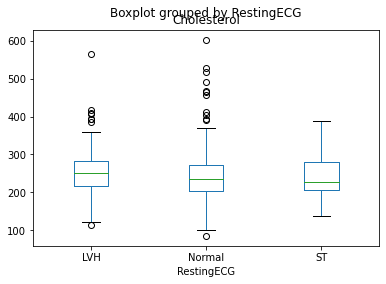

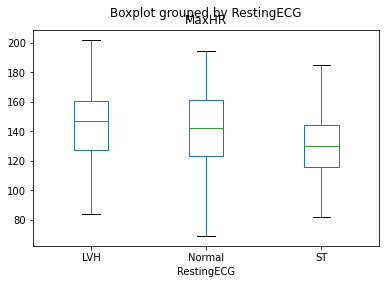

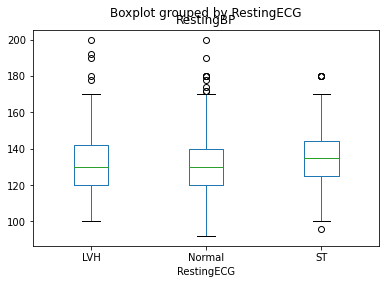

In [45]:
data.boxplot(by ='RestingECG', column =['Cholesterol'], grid = False)
data.boxplot(by ='RestingECG', column =['MaxHR'], grid = False)
data.boxplot(by ='RestingECG', column =['RestingBP'], grid = False)

<AxesSubplot:title={'center':'RestingBP'}, xlabel='FastingBS'>

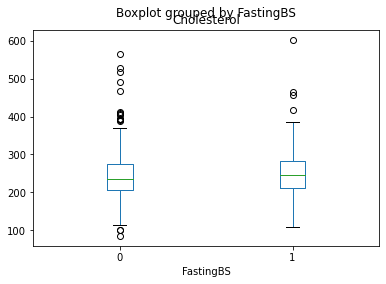

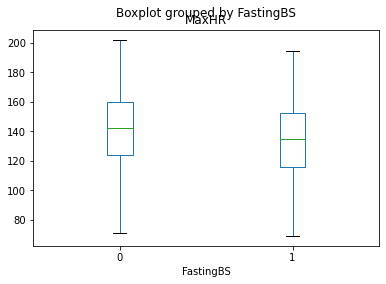

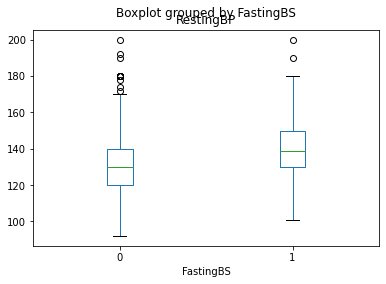

In [46]:
data.boxplot(by ='FastingBS', column =['Cholesterol'], grid = False)
data.boxplot(by ='FastingBS', column =['MaxHR'], grid = False)
data.boxplot(by ='FastingBS', column =['RestingBP'], grid = False)

Al observar los datos, se puede observar cómo al agrupar los datos de diversas formas para observar los niveles de colesterol, rítmo cardiaco y presión sanguínea, en la mayoría de datos, la distribución de los datos es similar entre los diferentes grupos. Lo que se puede notar, además de los valores extremos que se tendrán que tomar en cuenta a la hora de hacer los modelos, es que peculiarmente, entre las diferentes variables categóricas, el *nivel de colesterol* siempre se observa que tiene un cambio entre las agrupaciones realizadas, lo cual es algo interesante.

## 3. Técnicas de preprocesamiento y limpieza de datos

### Eliminación de valores incorrectos

Los cambios realizados mediante *OpenRefine* se adjuntan en el *changes.json*. Estos fueron:
- Eliminar las filas que presentaban un valor de **0** en la columna de colesterol, ya que esto corresponde a un error.  
- Eliminar una fila que presentaba un valor de **0** en la columna de ritmo cardiaco en reposo, ya que igualmente, corresponde a un error.

Estos cambios se aplicaron previo a realizar la exploración de datos, por lo que no se aprecian estos valores incorrectos, aunque igualmente se adjunta el dataset original como *heart_diseases.csv*

### Eliminación de valores extremos

Ahora, como se notaron tantos valores extremos, se eliminarán utilizando la regla del 1.5*IQR*.

In [47]:
Q1 = data['Cholesterol'].quantile(0.25)
Q3 = data['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Cholesterol']<(Q1-1.5*IQR)) | (data['Cholesterol']>(Q3+1.5*IQR)))]

Q1 = data['RestingBP'].quantile(0.25)
Q3 = data['RestingBP'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['RestingBP']<(Q1-1.5*IQR)) | (data['RestingBP']>(Q3+1.5*IQR)))]

data.describe()
y = data['HeartDisease']
data = data.drop(['HeartDisease'], axis = 1)

## 4. Transformación de datos, selección y extracción de atributos 

Como se muestra en el archivo *changes.json*:

### Cambios

- Todas las columnas se pasaron a datos numéricos, con valores que permitieran identificar los originales (en la columna de sex, el *masculino* pasa a ser 0 y el *femenino* 1, en la de angina por ejercicio, *sí* pasa a 1 y *no* a 0, en la de el electrocardiograma en reposo, normal pasa a ser 0, *st* pasa a ser 2 y *lvh* pasa a ser 1, en la de pendiente de st, la de *bajada* pasa a ser -1, la *plana* pasa a ser 0 y la de *subida* a 1, por último, en la columna de tipos de dolor de pecho, *ASY* pasa a ser 0, *NAP* pasa a ser 1, *ATA* pasa a ser 2 y *TA* pasa a ser 3  ). Esto con el fin de que sea más facil su manipulación a la hora de realizar el modelo.

## 5. Técnicas de segmentación o análisis de asociación 

In [48]:
encoder = ce.OneHotEncoder()
clustering = data
clustering = encoder.fit_transform(clustering)

### K-means

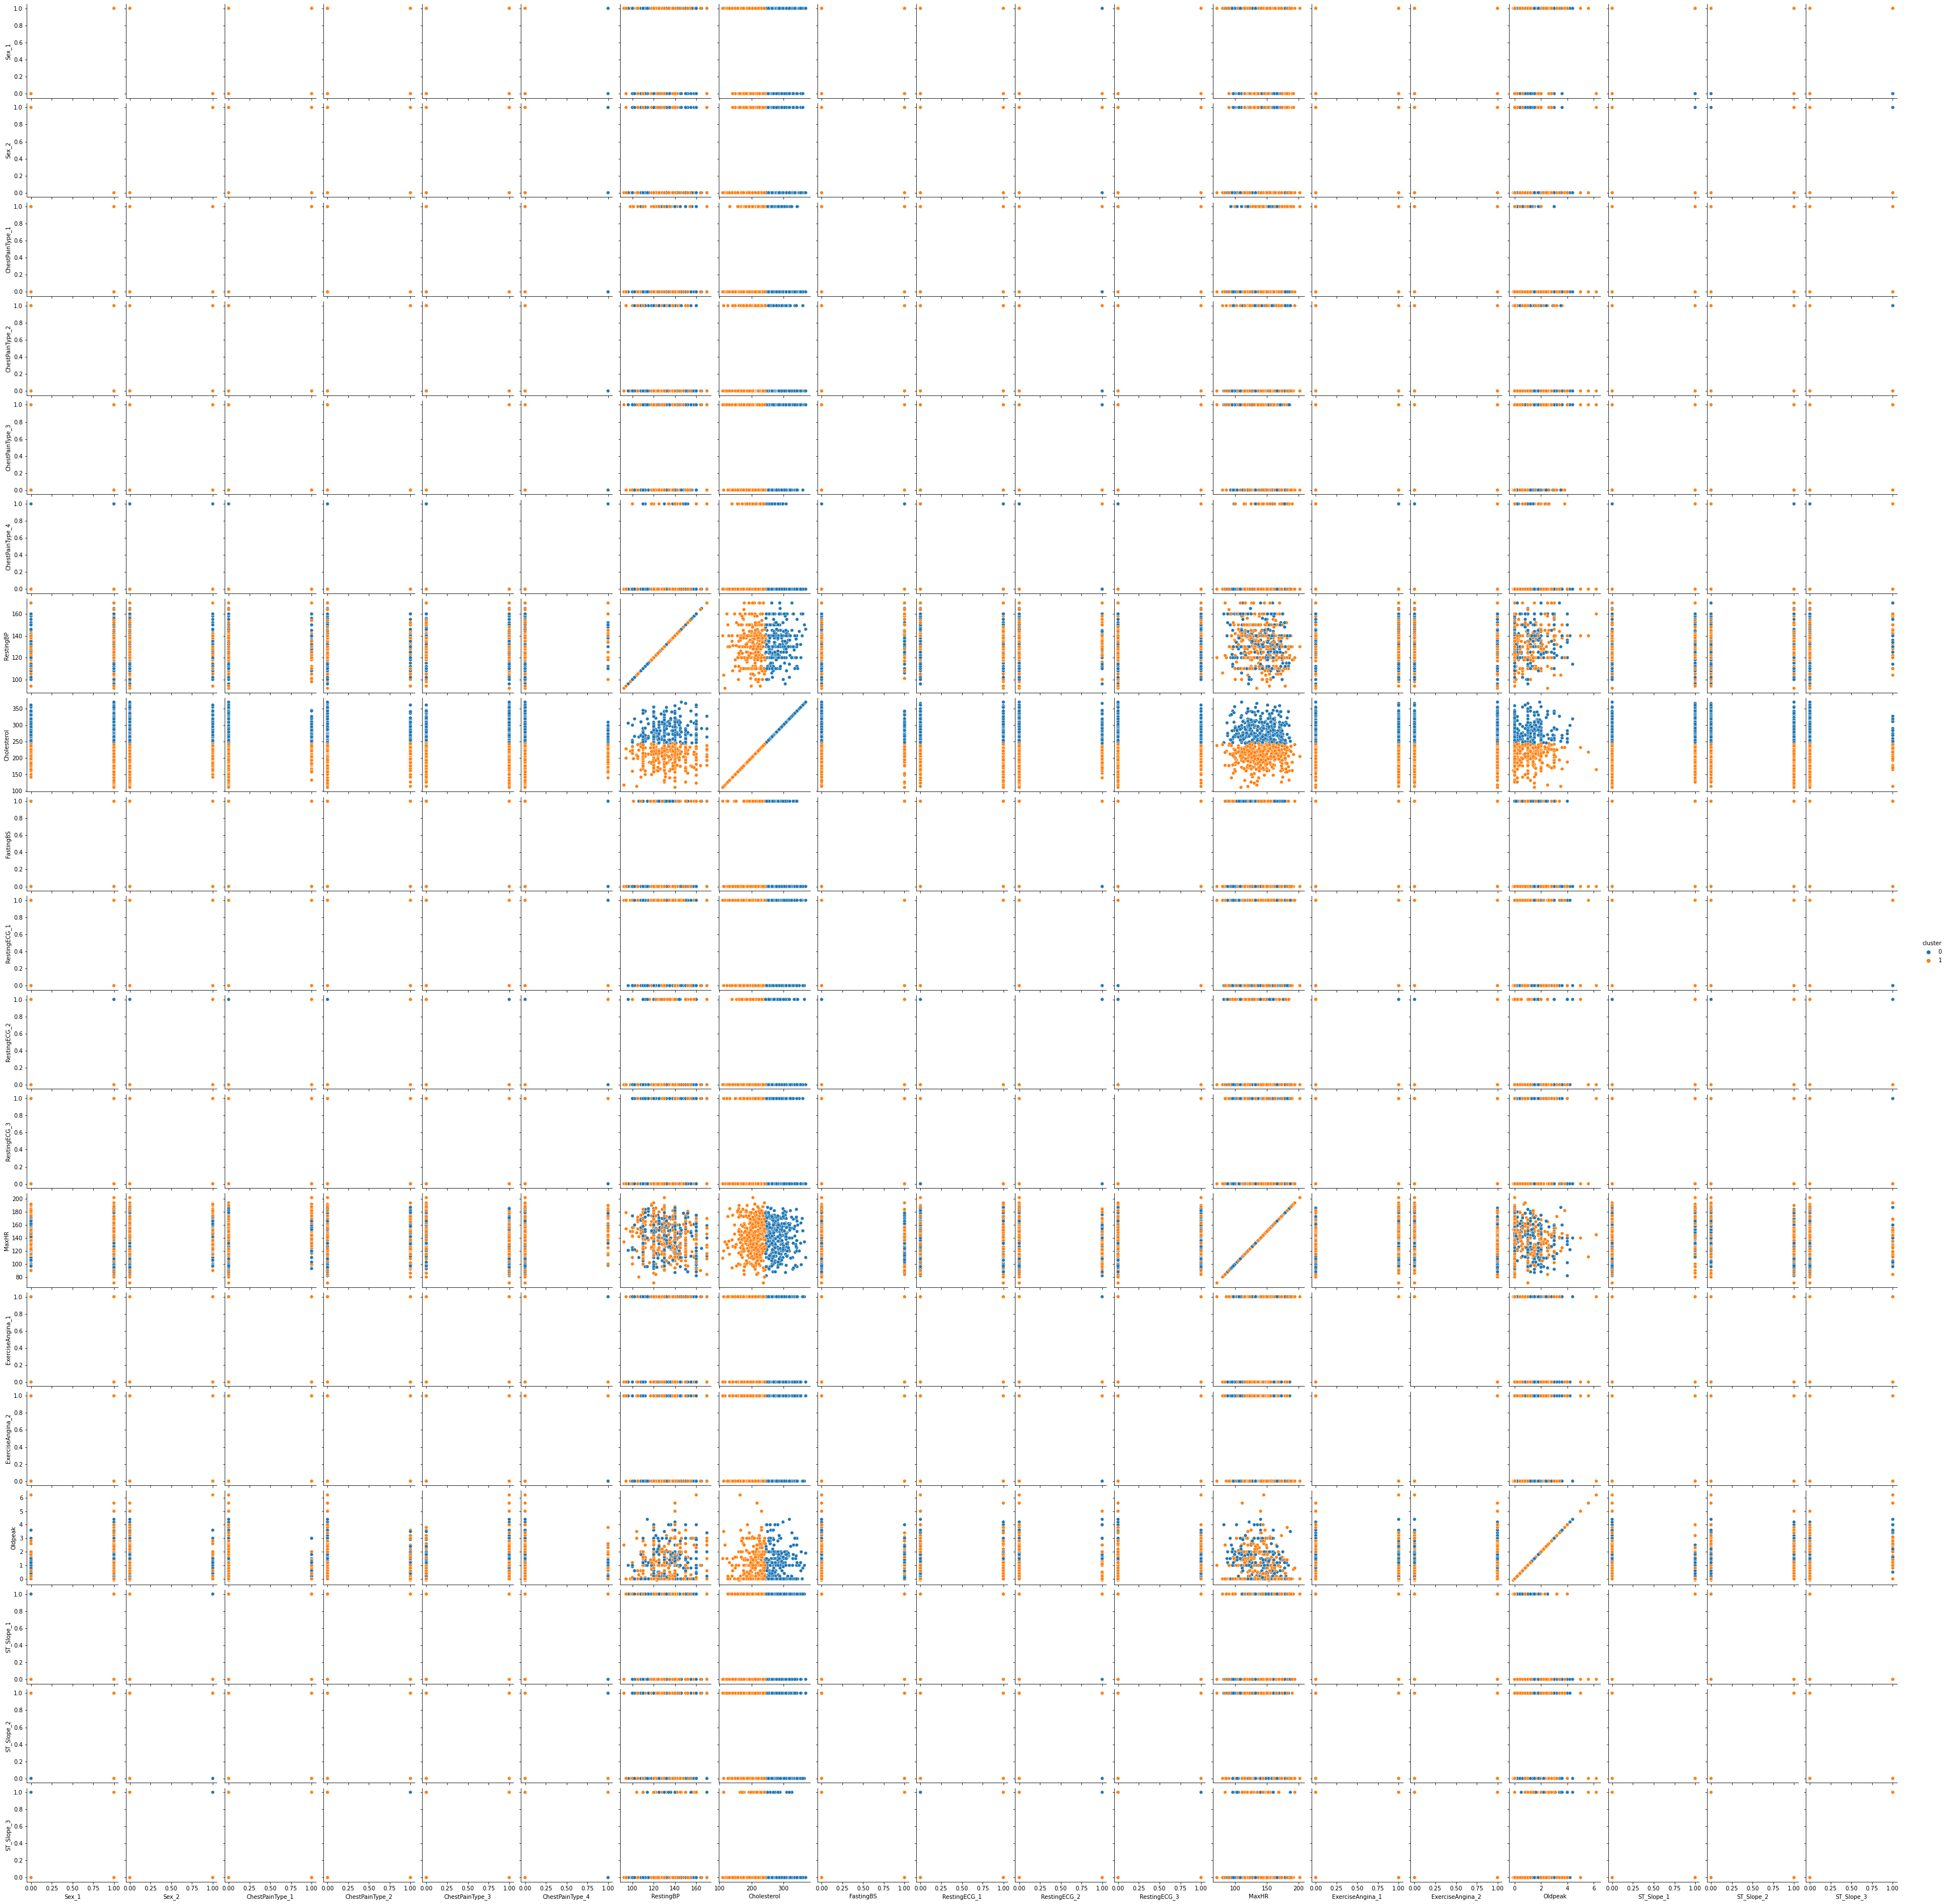

In [49]:
# define dataset
# define the model
model_kmeans = KMeans(n_clusters=2)
# fit the model
model_kmeans.fit(clustering)
# assign a cluster to each example
yhat = model_kmeans.predict(clustering)
# retrieve unique clusters
clusters = unique(yhat)
clustering['cluster'] = yhat
sns.pairplot(data=clustering,
             hue='cluster',
             diag_kind=None)

### DBSCAN

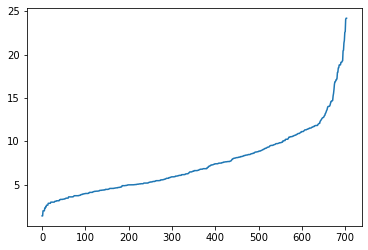

In [50]:
neighbors = NearestNeighbors(n_neighbors= 2*len(clustering.columns))
neighbors_fit = neighbors.fit(clustering)
distances, indices = neighbors_fit.kneighbors(clustering)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

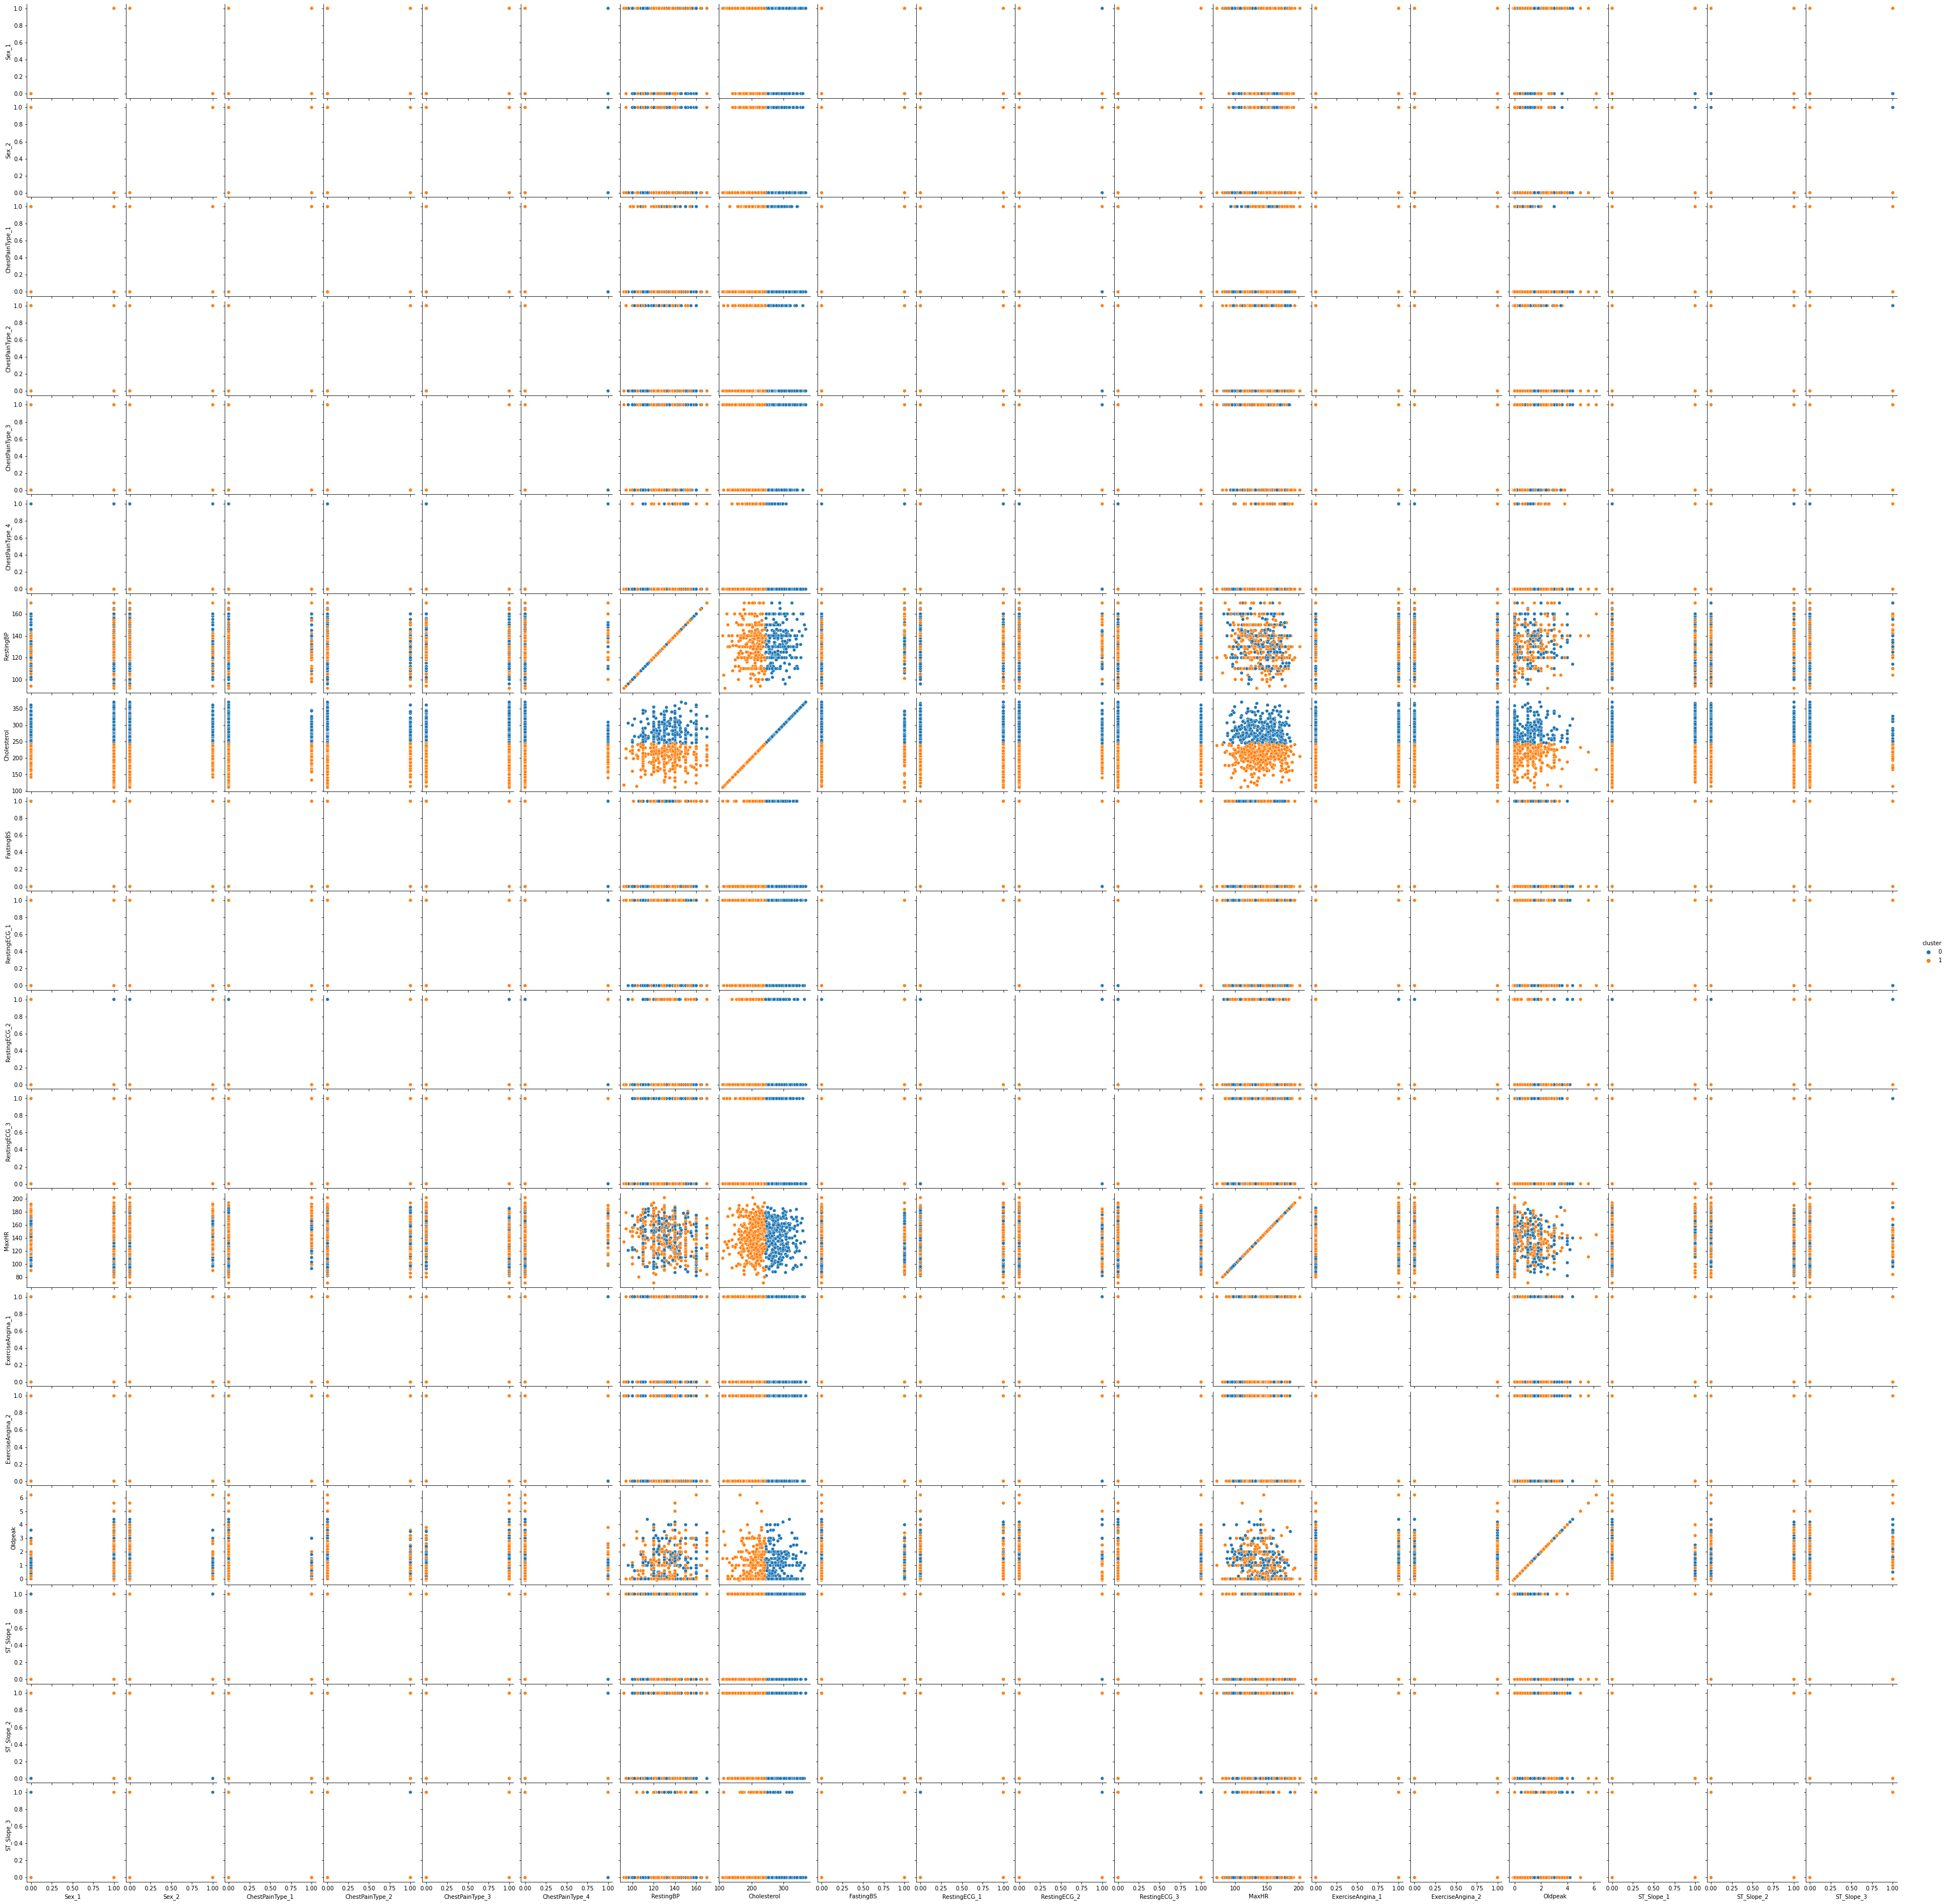

In [51]:
# define the model
data_dbscan = data
min_samples = len(clustering.columns)+1
model_dbscan = DBSCAN(eps=14, 
               min_samples=min_samples)
# fit model and predict clusters
yhat = model_dbscan.fit_predict(clustering)
# retrieve unique clusters
clusters = unique(yhat)
data_dbscan['cluster'] = yhat
sns.pairplot(data=clustering,
             hue='cluster',
             diag_kind=None)

### Resolución del problema

Las técnicas de K-means y Dbscan permiten resolver el problema planteado al ser dos diferentes algoritmos de aprendizaje no supervisado. De esta forma, al entrenar los modelos, son capaces de usar los casos con los que se entrenaron para predecir futuros casos.

## 6. Evaluación de modelos

### Evaluación del modelo K-Means

In [60]:
labels = model_kmeans.labels_
sh_kmeans = metrics.silhouette_score(clustering, labels)
print(f"Silhouette Coefficient:", sh_kmeans)

fm_kmeans = metrics.fowlkes_mallows_score(y, labels)
print(f"Fowlkes Mallows score:", fm_kmeans)

Silhouette Coefficient: 0.39531340215695965
Fowlkes Mallows score: 0.5101960076273947


Se puede observar que el modelo de K-Means obtiene un coeficiente de silueta de 0.395, lo que indica que a pesar de que hay clusters traslapados, existe cierta distinción entre ambos, permitiendo realizar predicciones con una alta capacidad. Se puede observar un puntaje Fowlkes Mallow de 0.5101, lo que reafirma que los clusters estén medianamente traslapados.

### Evaluación del modelo DBSCAN

In [61]:
labels = model_dbscan.labels_
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Cluster Amount:", num_clusters)
sh_dbscan = metrics.silhouette_score(clustering, labels)
print(f"Silhouette Coefficient:", sh_dbscan)

fm_dbscan = metrics.fowlkes_mallows_score(y, labels)
print(f"Fowlkes Mallows score:", fm_dbscan)

Cluster Amount: 2
Silhouette Coefficient: -0.12480911684676531
Fowlkes Mallows score: 0.5107653523776923


Se puede observar que el modelo de DBSCAN obtiene un coeficiente de silueta de -0.125 , lo que significa que los dos clusters están traslapados, es decir, la distancia entre ambos clusters es insignificante. Se puede observar un puntaje Fowlkes Mallow de 0.5107, lo que reafirma que los clusters estén traslapados. Además, como en el algoritmo de DBSCAN no se tiene un control directo sobre la cantidad de clusters formados, podemos observar que se generan dos clusters, lo cual nos permite responder la pregunta:

¿Pueden los atributos de las personas, como su nivel de colesterol, máximo ritmo cardiaco y presión arterial determinar si una persona presentará una enfermedad cardiovascular? 

## 7. Resultados

Se pueden ver los resultados en la siguiente tabla:

| Algoritmo | Silhouette Coefficient      | Fowlkes Mallows Score |
|-----------| ----------- | ----------- |
| K-Means   | 0.3953  | 0.5101|
| Dbscan    |-0.1248   | 0.5107|


Además de compararse en sus respectivas escalas mediante los siguiente gráficos:

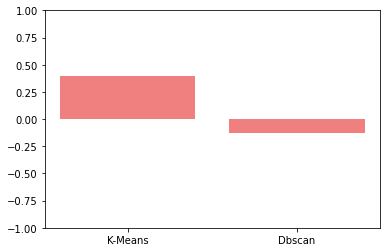

In [72]:
x_axis = ["k-means", "dbscan"]
y_axis = [sh_kmeans,  sh_dbscan]
plt.title = "Silhouette Coefficient"
plt.xlabel = "Algorithm"
plt.ylabel = "Silhouette Coefficient"
plt.ylim(-1,1)
plt.bar(x_axis,
        y_axis, 
        color = "lightcoral")
    
plt.xticks(x_axis, 
           ("K-Means", "Dbscan"))
plt.show()

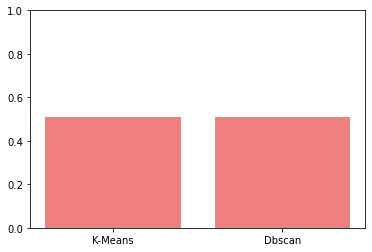

In [70]:
y_axis = [fm_kmeans,  fm_dbscan]
plt.title = "Fowlkes Mallows Score"
plt.xlabel = "Algorithm"
plt.ylabel = "Fowlkes Mallows Score"
plt.ylim(0,1)
plt.bar(x_axis,
        y_axis, 
        color = "lightcoral")
    
plt.xticks(x_axis, 
           ("K-Means", "Dbscan"))
plt.show()

## 8. Análisis de respuestas

Como se muestra, *K-Means* obtuvo mejores resultados que *Dbscan* tanto en el coeficiente de silueta como en la prueba de *Fowlkes Marrows*, lo que indica que este algoritmo presentó un mejor agrupamiento en los clusters. Entre muchas causas, esto puede deberse en parte al dataset considerablemente pequeño que se utilizó, donde de casi mil muestras originales, se usaron cerca de 700 al realizar la limpieza del dataset. 

Al analizar los gráficos obtenidos en la sección 5, para cada uno de los algoritmos, nos damos cuenta de la complejidad del modelo al presentar una cantidad considerable de características, por la que se podría hacer un análisis más exhaustivo para reducir la dimensionalidad del problema.

Con respecto a la pregunta propuesta, un coeficiente cercado a 0 en el algoritmo de *Dbscan* y de 0.4 en el *K-Means*, corresponde a resultados que a pesar de ser capaces de predecir con cierta certeza la pregunta de `¿Pueden los atributos de las personas, como su nivel de colesterol, máximo ritmo cardiaco y presión arterial determinar si una persona presentará una enfermedad cardiovascular?`, el nivel alcanzado no es uno lo suficientemente alto como para asegurar una buena respuesta la mayor parte de las veces, es decir, el modelo es capaz de dar una buena estimación de la pregunta, pero no de dar una respuesta con un nivel de certidumbre alto.